# Titanic Survival Analysis

In [3]:
# Import data manipulation library
import numpy as np
import pandas as pd
# Import data visulization library
import seaborn as sns
import matplotlib.pyplot as plt
# Import filter warnings library
import warnings 
warnings.filterwarnings('ignore')
# Import data preprocessing functions
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
# Import accuracy matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [4]:
# Load the data using pandas function
try:
    df = pd.read_csv('/Users/adityaanandraogaikwad/Desktop/Ml Updated /Titanic/titanic.csv')
    print('Loaded data sucessfully')
except:
    print('Error in data loading')

Loaded data sucessfully


In [5]:
df.sample(frac=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
459,460,0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q
740,741,1,1,"Hawksford, Mr. Walter James",male,NaN,0,0,16988,30.0000,D45,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S
508,509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S


In [6]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- So we have total 891 entries and 12 columns.
- data contains both numerical and categorical columns.
- and also data have null values.

<Axes: >

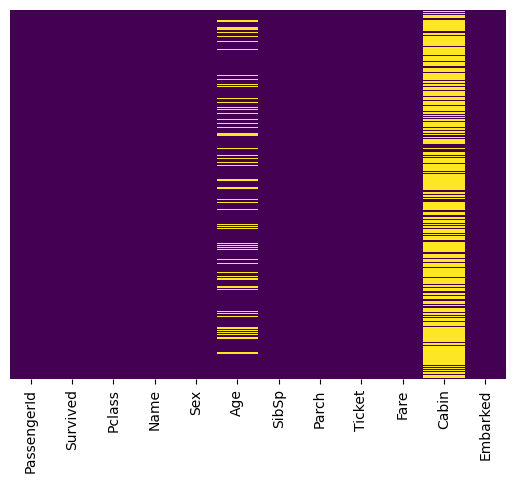

In [8]:
# another method to check the null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
numerical_data = df.select_dtypes(include='number')
categorical_data = df.select_dtypes(exclude='number')

In [10]:
# Univarite Analysis
from collections import OrderedDict
stats = []

for i in numerical_data:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Mean':numerical_data[i].mean(),
        'Median(50%)':numerical_data[i].median(),
        'Min':numerical_data[i].min(),
        'Max':numerical_data[i].max(),
        '75%':numerical_data[i].quantile(0.75),
        '25%':numerical_data[i].quantile(0.25),
        'Standard Deviation':numerical_data[i].std(),
        'Skewness':numerical_data[i].skew(),
        'Kurtosis':numerical_data[i].kurt(),
        'Missing':df[i].isnull().sum(),
        'Missing %':df[i].isnull().mean()*100
    })
    stats.append(numerical_stats)
report = pd.DataFrame(stats)
report.T

,0,1,2,3,4,5,6
Feature,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Mean,446.0,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
Median(50%),446.0,0.0,3.0,28.0,0.0,0.0,14.4542
Min,1.0,0.0,1.0,0.42,0.0,0.0,0.0
Max,891.0,1.0,3.0,80.0,8.0,6.0,512.3292
75%,668.5,1.0,3.0,38.0,1.0,0.0,31.0
25%,223.5,0.0,2.0,20.125,0.0,0.0,7.9104
Standard Deviation,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
Skewness,0.0,0.478523,-0.630548,0.389108,3.695352,2.749117,4.787317
Kurtosis,-1.2,-1.775005,-1.280015,0.178274,17.88042,9.778125,33.398141


In [11]:
# Univariate analysis for categorical data
stats = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_stat = OrderedDict({
            'Feature':col,
            'Mode': df[col].mode()[0],
            'Unique': df[col].nunique(),
            'Missing': df[col].isnull().sum(),
            'Missing %': df[col].isnull().mean()*100
        })
        stats.append(categorical_stat)

report = pd.DataFrame(stats)
report

,Feature,Mode,Unique,Missing,Missing %
0,Name,"Abbing, Mr. Anthony",891,0,0.000000
1,Sex,male,2,0,0.000000
2,Ticket,1601,681,0,0.000000
3,Cabin,B96 B98,147,687,77.104377
4,Embarked,S,3,2,0.224467


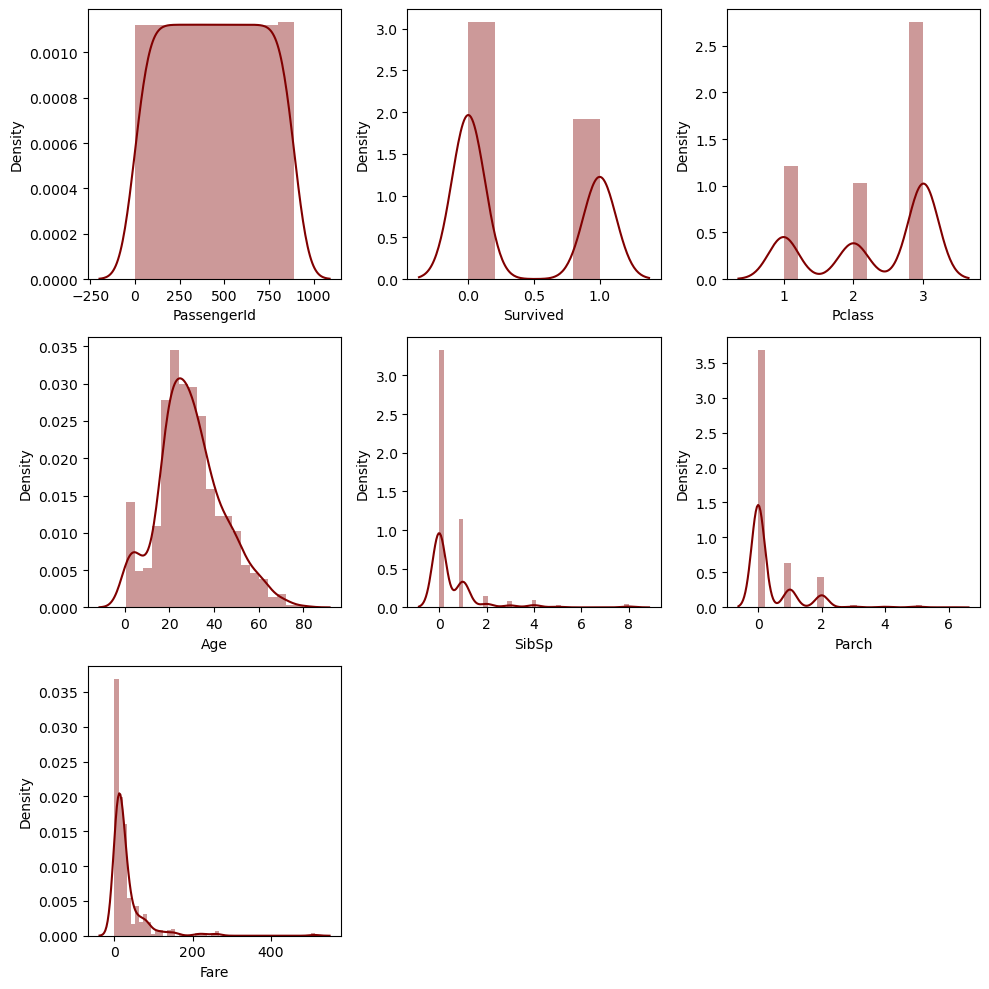

In [12]:
# Data distribution
plt.figure(figsize=(10,10))
plot = 0
for i in numerical_data:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.distplot(df[i],color='maroon')
plt.tight_layout()
plt.show()

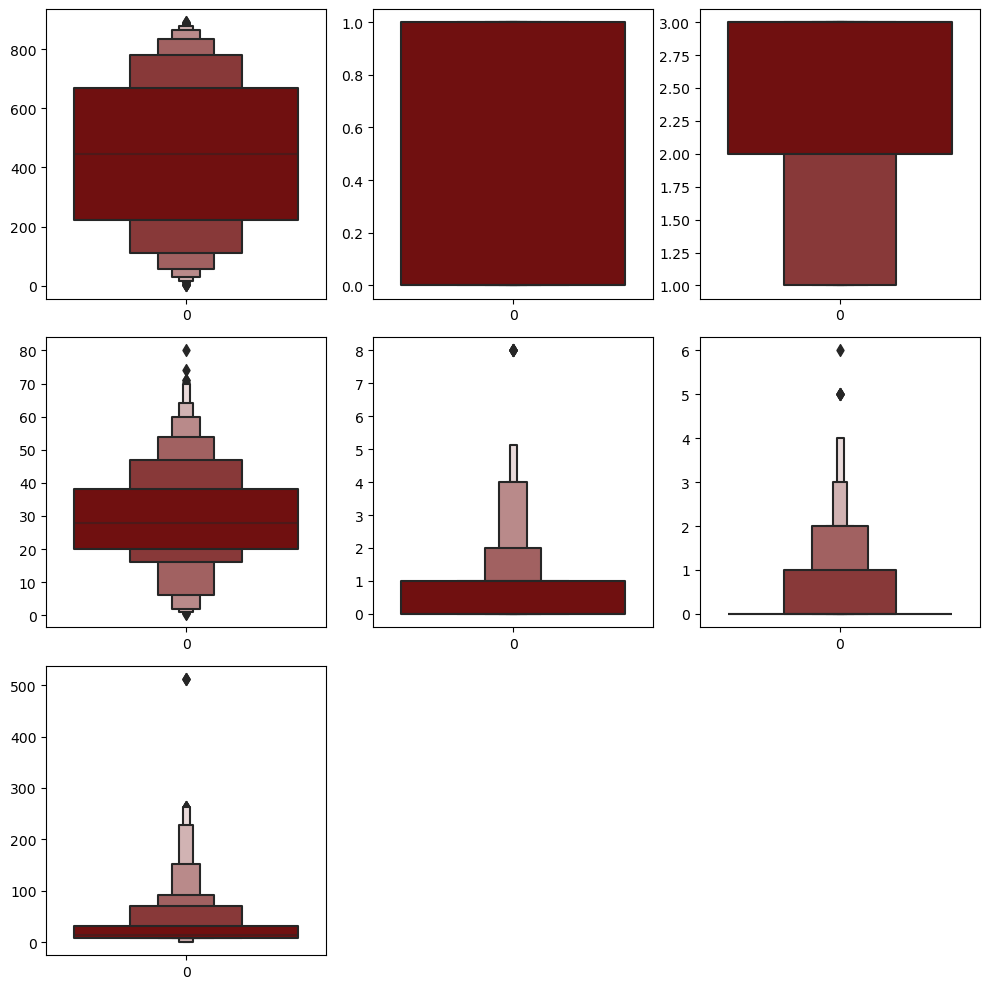

In [13]:
plt.figure(figsize =(10,10))
plot = 0
for i in numerical_data:
    plot = plot + 1
    plt.subplot(3,3,plot)
    sns.boxenplot(df[i],color ='maroon')
plt.tight_layout()
plt.show()

In [14]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

- Here we can see the total count of the passengers and most of the passengers are from third class.

In [17]:
crosstab_1 = pd.crosstab(index=df['Survived'],columns=[df['Pclass'],df['Sex']])
crosstab_1

Pclass        1           2           3     
Sex      female male female male female male
Survived                                    
0             3   77      6   91     72  300
1            91   45     70   17     72   47

- From above analysis we can get know that most of the male passengers are died in third class as compare to other passenger class.

In [19]:
print("C - Cherbourg\nQ - Queenstown\nS - Southampton")
crosstab_2 = pd.crosstab(index=df['Survived'],columns=[df['Embarked'],df['Sex']])
crosstab_2

C - Cherbourg
Q - Queenstown
S - Southampton


Embarked      C           Q           S     
Sex      female male female male female male
Survived                                    
0             9   66      9   38     63  364
1            64   29     27    3    140   77

- From above analysis we can see that most of the passengers are borded from S(Southampton).
- and maximum male passenger were died from Southampton.
- also maximum female passegers are survived from the Southampton.

In [21]:
crosstab_3 = pd.crosstab(index=df['Survived'],columns=[df['Embarked'],df['Pclass']])
crosstab_3

Embarked   C         Q          S         
Pclass     1  2   3  1  2   3   1   2    3
Survived                                  
0         26  8  41  1  1  45  53  88  286
1         59  9  25  1  2  27  74  76   67

<Axes: xlabel='Sex,Pclass,Survived'>

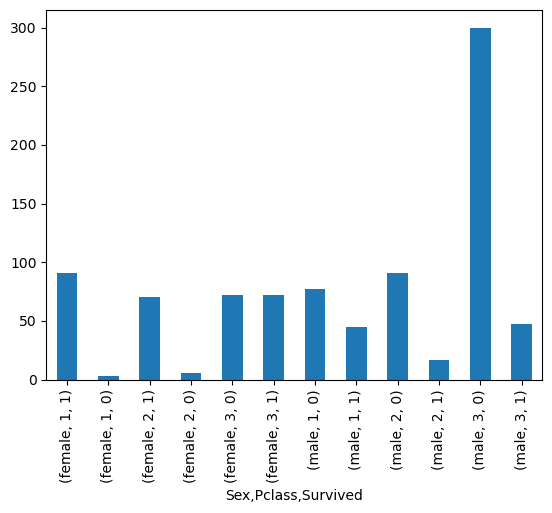

In [22]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
survived_data = df.groupby(['Sex','Pclass']).Survived.value_counts()
survived_data.plot(kind='bar')

- Here we can see the visual representation of the passengers survival with their class and passenger type.

In [24]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
survived_data = df.groupby(['Sex','Pclass']).value_counts()
survived_data

Sex     Pclass  PassengerId  Survived  Name                                                                                Age    SibSp  Parch  Ticket             Fare      Cabin            Embarked
female  1       2            1         Cumings, Mrs. John Bradley (Florence Briggs Thayer)                                 38.00  1      0      PC 17599           71.2833   C85              C           1
                4            1         Futrelle, Mrs. Jacques Heath (Lily May Peel)                                        35.00  1      0      113803             53.1000   C123             S           1
                312          1         Ryerson, Miss. Emily Borie                                                          18.00  2      2      PC 17608           262.3750  B57 B59 B63 B66  C           1
                320          1         Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)                            40.00  1      1      16966              134.5000  E34             

- Here we can see the detailed information of their class and passenger type.

<Axes: xlabel='Sex,Embarked,Survived'>

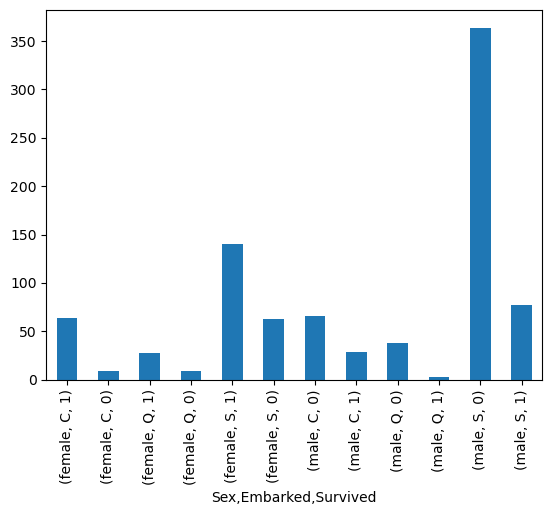

In [26]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
survived_data = df.groupby(['Sex','Embarked']).Survived.value_counts()
survived_data.plot(kind='bar')

- Here we can see the visual representation of the passengers survival with their boarding location and passenger type.

In [28]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
survived_data = df.groupby(['Sex','Embarked']).value_counts()
survived_data

Sex     Embarked  PassengerId  Survived  Pclass  Name                                                                                Age    SibSp  Parch  Ticket             Fare      Cabin          
female  C         2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)                                 38.00  1      0      PC 17599           71.2833   C85                1
                  53           1         1       Harper, Mrs. Henry Sleeper (Myna Haxtun)                                            49.00  1      0      PC 17572           76.7292   D33                1
                  540          1         1       Frolicher, Miss. Hedwig Margaritha                                                  22.00  0      2      13568              49.5000   B39                1
                  582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)                                39.00  1      1      17421              110.8833  C68   

- Here we can see the detailed information of their bording location and passenger type.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
# Fill the missing values using KNN imputer
from sklearn.impute import SimpleImputer, KNNImputer
imputer = KNNImputer(n_neighbors=5)
df['Age'] = imputer.fit_transform(df[['Age']])

In [32]:
df['Cabin'].value_counts()

Cabin
B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
E101               3
D                  3
C78                2
C93                2
E8                 2
D36                2
B77                2
C123               2
E121               2
E44                2
D35                2
C125               2
E67                2
B35                2
B18                2
E24                2
B49                2
C65                2
B20                2
B5                 2
B57 B59 B63 B66    2
C126               2
B51 B53 B55        2
F4                 2
C124               2
F G73              2
B58 B60            2
C52                2
D33                2
C68                2
D20                2
D26                2
B28                2
C83                2
E25                2
D17                2
B22                2
C92                2
C2                 2
E33                2
C70                1
E58    

In [33]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
# Droped the unwanted columns
df.drop(columns=['PassengerId','Name','Ticket','Fare','Cabin'],inplace=True)

In [35]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [36]:
df['Embarked']= df['Embarked'].fillna('S')
df['Embarked']= df['Embarked'].replace({'S':0,'C':1,'Q':2})
df['Sex']= df['Sex'].replace({'male':0,'female':1})

In [37]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [38]:
# Split the data into Feature and target
X = df.drop(columns=['Survived'])
y = df['Survived']

In [39]:
# Split the data for training and testing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(623, 6) (268, 6) (623,) (268,)


In [40]:
scalar =  MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [41]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)

In [42]:
# Import Machile Learning Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [43]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'KNeighbors Classifier' : KNeighborsClassifier(),
    'RandomForest Classifier': RandomForestClassifier(),
    'SVC' : SVC() 
}

for i in models:
    model = models[i]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print('Model:',i)
    print('Accuracy:',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('\n')

Model: Logistic Regression
Accuracy: 0.8171641791044776
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       157
           1       0.75      0.83      0.79       111

    accuracy                           0.82       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.82      0.82      0.82       268



Model: Decision Tree
Accuracy: 0.7649253731343284
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       157
           1       0.73      0.68      0.71       111

    accuracy                           0.76       268
   macro avg       0.76      0.75      0.76       268
weighted avg       0.76      0.76      0.76       268



Model: KNeighbors Classifier
Accuracy: 0.7761194029850746
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       157
           1       0.72      0.76      0.74       111

    accuracy  

# Deep Learning

### ANN Technique

In [46]:
# Importing Deep Learning Library
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [47]:
X.shape

(891, 6)

In [48]:
ann_model = Sequential()
ann_model.add(Dense(128,activation='relu',input_dim = 6))
ann_model.add(Dense(64,activation='relu'))
ann_model.add(Dense(32,activation='relu'))
ann_model.add(Dense(16,activation='relu'))
ann_model.add(Dense(1,activation='sigmoid'))

In [49]:
ann_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
ann_model.fit(X_train,y_train,epochs=2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5447 - loss: 0.6877 - val_accuracy: 0.6102 - val_loss: 0.6605
Epoch 2/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7733 - loss: 0.6082 - val_accuracy: 0.7458 - val_loss: 0.5460
Epoch 3/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7796 - loss: 0.4974 - val_accuracy: 0.6822 - val_loss: 0.6451
Epoch 4/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7808 - loss: 0.4876 - val_accuracy: 0.7373 - val_loss: 0.5314
Epoch 5/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4696 - val_accuracy: 0.7331 - val_loss: 0.5002
Epoch 6/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8123 - loss: 0.4471 - val_accuracy: 0.7119 - val_loss: 0.5638
Epoch 7/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7766 - loss: 0.4696 - val_accuracy: 0.7076 - val_loss: 0.5673
Epoch 8/2000
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8213 - loss: 0.4222 - val_accuracy: 0.

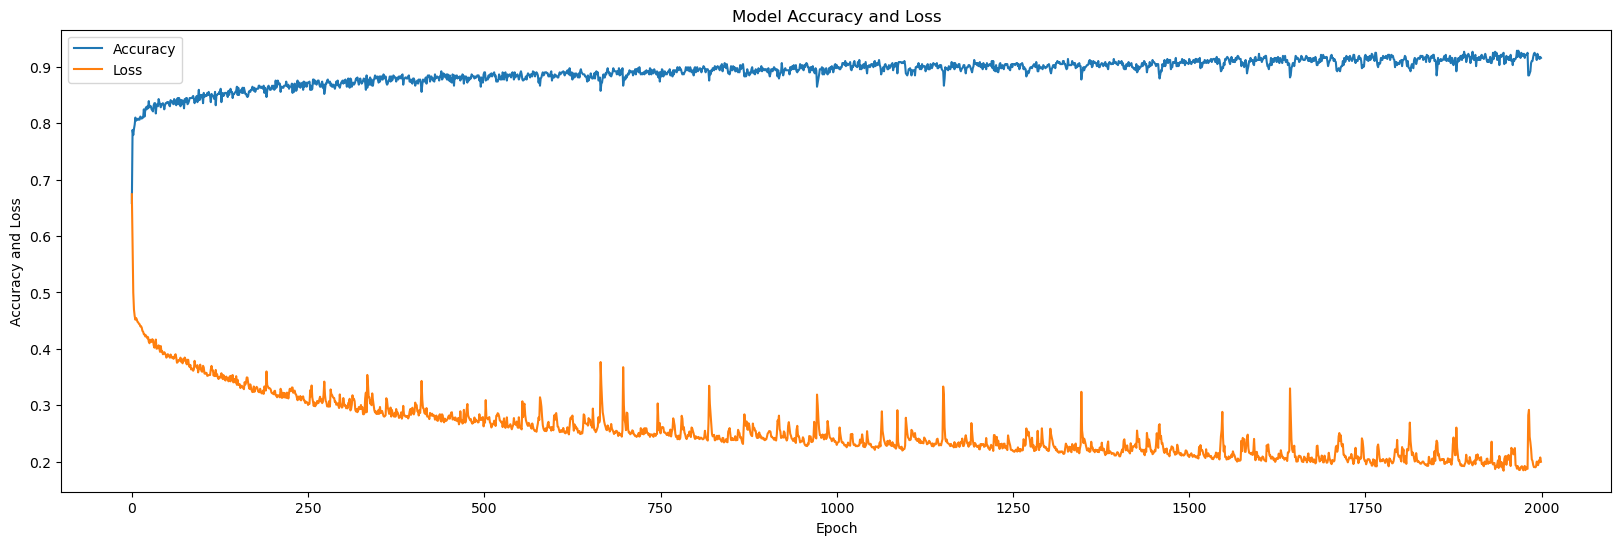

In [51]:
model_history = ann_model.history.history

plt.figure(figsize = (20,6))
plt.plot(model_history['accuracy'])
plt.plot(model_history['loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'],loc = 'upper left')
plt.show()

In [52]:
y_pred_ann = ann_model.predict(X_test)
y_pred_ann = np.where(y_pred_ann > 0.5,1,0)
print('Classification Report :',classification_report(y_test,y_pred_ann))
print('Accuracy Score :',accuracy_score(y_test,y_pred_ann))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report :               precision    recall  f1-score   support

           0       0.78      0.81      0.80       157
           1       0.72      0.68      0.70       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

Accuracy Score : 0.7574626865671642


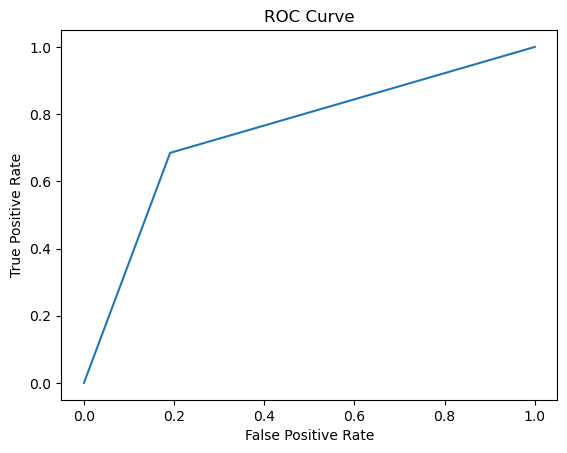

In [53]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,thresholds = roc_curve(y_test,y_pred_ann)
plt.plot(fpr,tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()